<a href="https://colab.research.google.com/github/Ankita-Sarkar01/CODSOFT/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving IMDb Movies India.csv to IMDb Movies India.csv
Data Loaded Successfully!

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None

Missing Values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

First 5 Rows:
                                 Name    Year Duration     

/tmp/ipython-input-1-3588244923.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration'].fillna(df['Duration'].median(), inplace=True)
/tmp/ipython-input-1-3588244923.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl


Model Trained Successfully!

Evaluation Metrics:
MAE: 0.9859892676767676
RMSE: 1.2525463666084375
R² Score: 0.15613237169757355


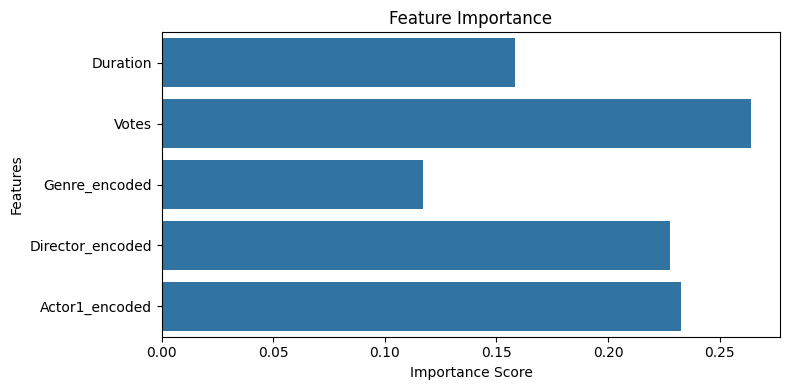

In [1]:
# STEP 0: Upload CSV File
from google.colab import files
uploaded = files.upload()

# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# STEP 2: Load Dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
print("Data Loaded Successfully!")

# STEP 3: Initial Exploration
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nFirst 5 Rows:")
print(df.head())

# STEP 4: Data Cleaning
# Drop rows without Rating
df = df.dropna(subset=['Rating'])

# Convert Duration to numeric
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)
df['Duration'].fillna(df['Duration'].median(), inplace=True)

# Fill missing values for categorical columns
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = df[col].fillna('Unknown')

# Clean and convert Votes
df['Votes'] = df['Votes'].astype(str).str.replace(',', '')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'].fillna(df['Votes'].median(), inplace=True)

# STEP 5: Feature Engineering
# Use only the main genre
df['Main Genre'] = df['Genre'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown')

# Encode categorical variables
le_genre = LabelEncoder()
le_director = LabelEncoder()
le_actor1 = LabelEncoder()

df['Genre_encoded'] = le_genre.fit_transform(df['Main Genre'])
df['Director_encoded'] = le_director.fit_transform(df['Director'])
df['Actor1_encoded'] = le_actor1.fit_transform(df['Actor 1'])

# STEP 6: Define Features and Target
features = ['Duration', 'Votes', 'Genre_encoded', 'Director_encoded', 'Actor1_encoded']
target = 'Rating'

X = df[features]
y = df[target]

# STEP 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 8: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("\nModel Trained Successfully!")

# STEP 9: Model Evaluation
y_pred = model.predict(X_test)

print("\nEvaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# STEP 10: Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
